In [1]:
import numpy as np
import Triple_dynamics as Tr
import spin_models as spin
import matplotlib.pyplot as plt
from tqdm import tqdm
import Trip_utils as util
import Kickrateplots as kickplots

In [2]:
Nruns = 50
Tr_objects = [Tr.Tripledynamics() for _ in tqdm(range(Nruns), desc="Triple MBH instances being created...")]

Triple MBH instances being created...:   0%|          | 0/50 [00:00<?, ?it/s]/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Triple_dynamics.py:56: RuntimeWarning: divide by zero encountered in divide
  func = 1/dadt
/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Triple_dynamics.py:47: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  tau = integrate.quad(interp_func,a_triple_after,0)[0]
Triple MBH instances being created...:   2%|▏         | 1/50 [00:08<07:01,  8.61s/it]/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Triple_dynamics.py:56: RuntimeWarning: divide by ze

In [3]:
util.Trip_stats(Tr_objects)

Average prompt merger is 113.92 which is 21.91 %
Average merger after ejection is 183.74 which is 35.33 %
Average total mergers is 297.66 which is 57.24 %
There are 222.34 no mergers on average which is 42.76%


In [4]:
iso_bin = Tr.iso_binary()
weak_tr = Tr.weak_triples()

In [5]:
merger_rates = [
   obj.total_merger_rate("all", zbinsize=0.2, zmax=7) for obj in tqdm(Tr_objects, desc="Calculating Merger Rates")
]
strong_triple_merger_rate = np.mean(merger_rates)

print(f"Total strong triple merger rate is : {strong_triple_merger_rate}")


iso_bin_merger_rate = iso_bin.total_merger_rate(zbinsize=0.2, zmax=7)
total_merger_rate = strong_triple_merger_rate+iso_bin.total_merger_rate(zbinsize=0.2, zmax=7)+weak_tr.total_merger_rate(zbinsize=0.2, zmax=7)

print(f"Merger rate considering only isolated binaries is {iso_bin_merger_rate:.2f} yr^-1")
print(f"Total merger rate including strong and weak triples is {total_merger_rate:.3f} yr^-1")

print(f"Merger rate increases from {iso_bin_merger_rate:.2f} to {iso_bin_merger_rate+strong_triple_merger_rate:.2f} which is {strong_triple_merger_rate/iso_bin_merger_rate * 100:.1f} % increase when we add strong triples ")
print(f"After adding both strong and weak triples the merger rate is {total_merger_rate:.2f} which is a {(total_merger_rate-iso_bin_merger_rate)/iso_bin_merger_rate * 100:.1f} % increase")

Calculating Merger Rates: 100%|██████████| 50/50 [00:01<00:00, 25.49it/s]

Total strong triple merger rate is : 0.01852471359117769


Merger rate considering only isolated binaries is 0.37 yr^-1
Total merger rate including strong and weak triples is 0.402 yr^-1


Merger rate increases from 0.37 to 0.38 which is 5.1 % increase when we add strong triples 
After adding both strong and weak triples the merger rate is 0.40 which is a 9.8 % increase


In [8]:
#random and slingshot invalid mergers
invalid_iso,invalid_weak,invalid_strong = 0,0,0
for i in range(10):
    iso_inv,weak_inv,strong_inv = Tr.find_invalid_mergers(Tr_objects[i],weak_tr,iso_bin,"random")
    invalid_iso += np.sum(iso_inv)
    invalid_weak += np.sum(weak_inv)
    invalid_strong += np.sum(strong_inv)

In [9]:
print(f"{invalid_iso/10:.0f} iso binary mergers are invalid which is {invalid_iso/10/np.sum(iso_bin.z_merger>0) * 100:.1f}% of all iso binary mergers")
print(f"{invalid_weak/10:.0f} weak triple mergers are invalid which is {invalid_weak/10/np.sum(weak_tr.z_merger>0) * 100:.1f}% of all weak triple mergers")
print(f"{invalid_strong/10:.0f} strong triple mergers are invalid which is {invalid_strong/10/np.sum(Tr_objects[0].z_triple_merger>0) * 100:.1f}% of all strong triple mergers")
print(f"{(invalid_weak+invalid_strong)/10:.0f} triple mergers are invalid which is {(invalid_weak+invalid_strong)/10/(np.sum(weak_tr.z_merger>0)+np.sum(Tr_objects[0].z_triple_merger>0)) * 100:.1f}% of all triple mergers")
print(f"{(invalid_iso+invalid_weak+invalid_strong)/10:.0f} total mergers are invalid which is {(invalid_iso+invalid_weak+invalid_strong)/10/4562 * 100:.1f}% of all mergers")

517 iso binary mergers are invalid which is 13.3% of all iso binary mergers
92 weak triple mergers are invalid which is 23.8% of all weak triple mergers
40 strong triple mergers are invalid which is 13.3% of all strong triple mergers
132 triple mergers are invalid which is 19.2% of all triple mergers
649 total mergers are invalid which is 14.2% of all mergers


The merger rate files are saved at /Users/pranavsatheesh/Triples/Github/Illustris_Data/


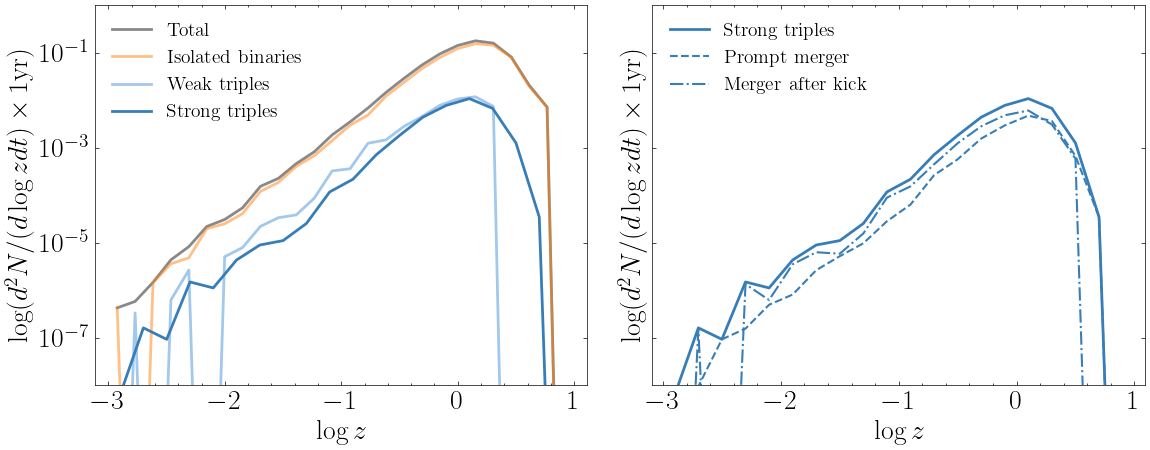

In [10]:
fig,axes = Tr.plot_merger_rates(Tr_objects,weak_tr,iso_bin,Nruns)
fig.savefig(f"Figures/Merger_rate_total_N_{Nruns:d}.pdf")

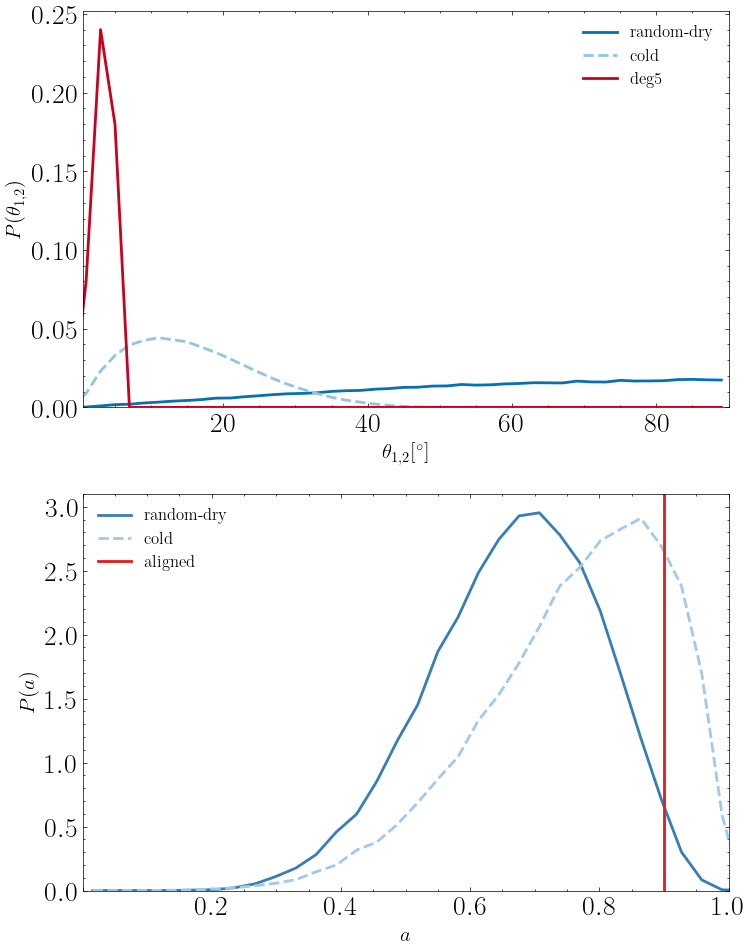

In [13]:
fig,axes = kickplots.plot_spin_dist()
fig.savefig("Figures/spin-models-magnitude-and-angle.pdf")

In [14]:
sling_v = [kick for kick in Tr_objects[0].slingshot_kicks if kick > 0]
sling_v = np.array(sling_v)
np.max(sling_v)
np.min(sling_v)
np.sum(sling_v>600)

114

Fraction of sling velocity abover 600 km/s is 22.39 %
Fraction of random velocity abover 600 km/s is 26.57 %
Fraction of hybrid velocity abover 600 km/s is 5.03 %
Fraction of aligned velocity abover 600 km/s is 0.01 %
--------
The maximum sling kick is 8149.61 km/s
The minimum sling kick is 80.19 km/s
--------
The maximum random kick is 3525.25 km/s
The minimum random kick is 0.00 km/s
--------
The maximum hybrid kick is 2592.54 km/s
The maximum aligned kick is 609.80 km/s


(<Figure size 700x500 with 1 Axes>,
 <AxesSubplot: xlabel='$v \\, (\\log \\, \\text{km} \\, \\text{s}^{-1}$)', ylabel='Density'>)

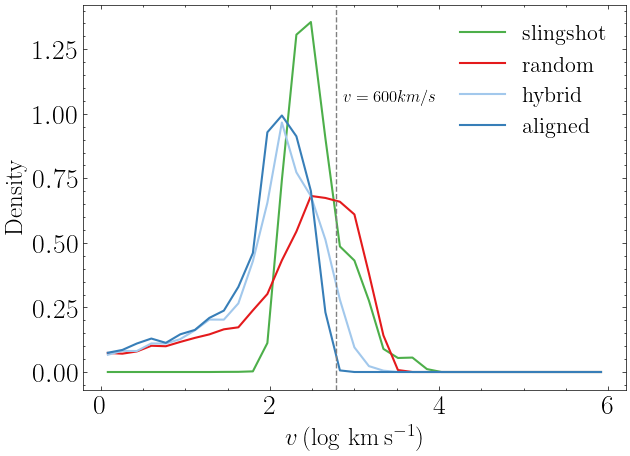

In [15]:
# kick distribution plot

kickplots.kick_velocity_dist_plot(Tr_objects,weak_tr,iso_bin,Nruns)

In [16]:
sling_esc = []
rand_esc = []
hybrid_esc = []
deg5_esc = []

for i in range(Nruns):
    sling_esc.append(np.sum(Tr_objects[i].slingshot_kicks>Tr_objects[i].Vescape))
    rand_esc.append(np.sum(Tr_objects[i].gw_kick_random>Tr_objects[i].Vescape))
    hybrid_esc.append(np.sum(Tr_objects[i].gw_kick_hybrid>Tr_objects[i].Vescape))
    deg5_esc.append(np.sum(Tr_objects[i].gw_kick_5deg>Tr_objects[i].Vescape))

In [17]:
print("Out of 520 strong triples...")
print(f"{np.mean(sling_esc)/520 * 100:.2f}% of them have slingshot kicks greater than Vesc")
print(f"{np.mean(rand_esc)/520 * 100:.2f}% of them have GW-random kicks greater than Vesc")
print(f"{np.mean(hybrid_esc)/520 * 100:.2f}% of them have GW-hybrid kicks greater than Vesc")
print(f"{np.mean(deg5_esc)/520 * 100:.2f}% of them have GW-aligned kicks greater than Vesc")

Out of 520 strong triples...
8.72% of them have slingshot kicks greater than Vesc
8.97% of them have GW-random kicks greater than Vesc
0.88% of them have GW-hybrid kicks greater than Vesc
0.06% of them have GW-aligned kicks greater than Vesc


In [18]:
print("Out of 9234 systems...")

print(f"{(np.mean(rand_esc)+np.sum(iso_bin.gw_kick_random>iso_bin.Vescape)+np.sum(weak_tr.gw_kick_random>weak_tr.Vescape))/9234 * 100:.2f}% of them have GW-random kicks greater than Vesc")
print(f"{(np.mean(hybrid_esc)+np.sum(iso_bin.gw_kick_hybrid>iso_bin.Vescape)+np.sum(weak_tr.gw_kick_hybrid>weak_tr.Vescape))/9234 * 100:.2f}% of them have GW-hybrid kicks greater than Vesc")
print(f"{(np.mean(deg5_esc)+np.sum(iso_bin.gw_kick_5deg>iso_bin.Vescape)+np.sum(weak_tr.gw_kick_5deg>weak_tr.Vescape))/9234 * 100:.2f}% of them have GW-hybrid kicks greater than Vesc")
print("%2.3f %% have slingshot kicks above Vesc"%(np.mean(sling_esc)/9234 * 100))

Out of 9234 systems...
13.52% of them have GW-random kicks greater than Vesc
1.46% of them have GW-hybrid kicks greater than Vesc
0.21% of them have GW-hybrid kicks greater than Vesc
0.491 % have slingshot kicks above Vesc


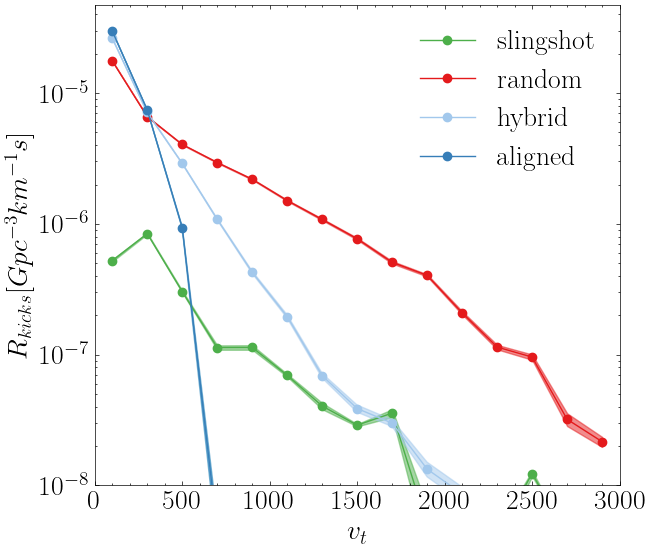

In [28]:
# GW kick rate plot
fig,ax = kickplots.plot_rate_kicks(Tr_objects,weak_tr,iso_bin,v_max=3000,vbin_size=200,Nruns=Nruns)
fig.savefig("Figures/kick_rates_for_spins.pdf")

In [23]:
print(f"Total number of mergers in 9234 is {np.sum(iso_bin.z_merger>0)+np.sum(weak_tr.z_merger>0)+np.sum(Tr_objects[0].z_triple_merger>0):d}")
iso_inv,weak_inv,strong_inv = Tr.find_invalid_mergers(Tr_objects[0],weak_tr,iso_bin,"random")
iso_inv,weak_inv,strong_inv = Tr.find_invalid_mergers(Tr_objects[0],weak_tr,iso_bin,"5deg")

Total number of mergers in 9234 is 4563


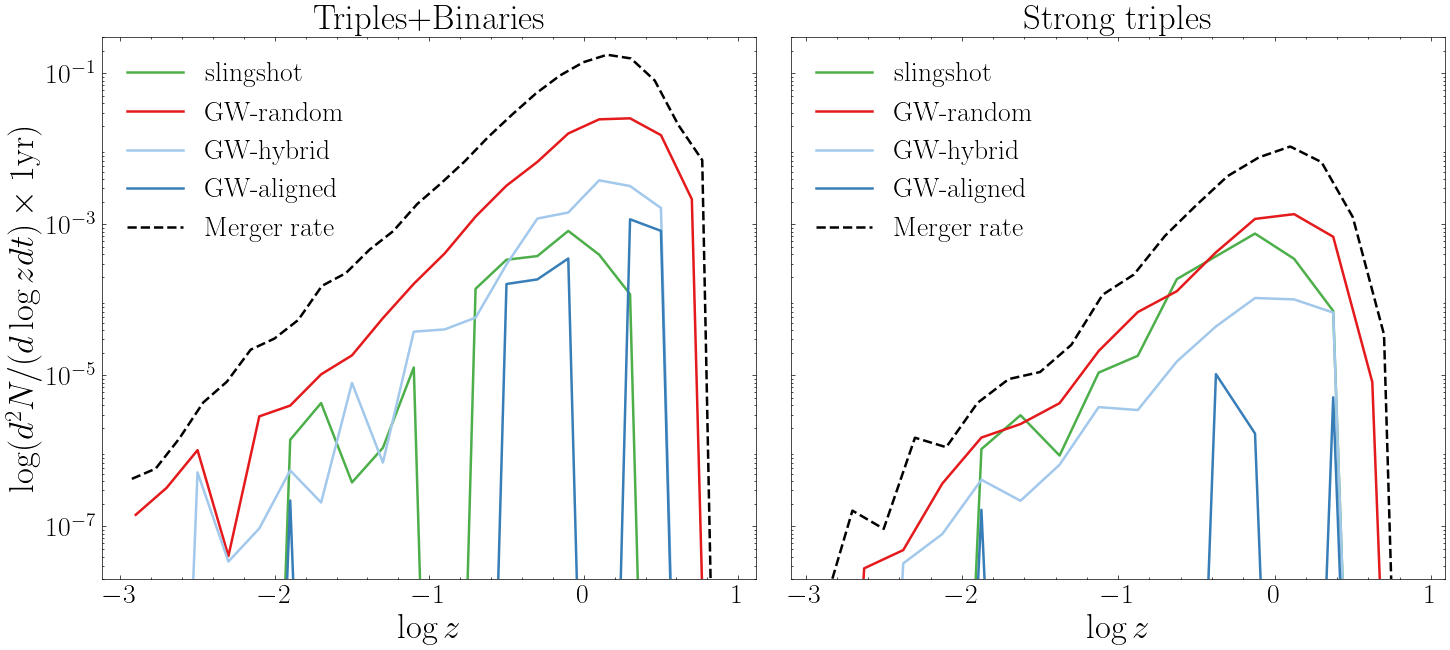

In [27]:
fig,ax = Tr.plot_ejection_rates(Tr_objects,weak_tr,iso_bin,Nruns)
fig.savefig("Figures/ejection_rates_all_and_triples_{Nruns:d}.pdf")